# Data Profiling
- Imports dataset as a `pandas` dataframe
- Prints data profile report for each feature of dataframe
- Outputs data profile report to `.json` and `.csv` 
- Visualizes dataset with `seaborn` `.pairplot()` and `.heatmap()` (optional) and exports `.png`

## Import Modules

In [1]:
import pandas
import numpy
import random
import datetime
import math
import seaborn
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
seaborn.set(rc = {"figure.figsize":(16,12)})
seaborn.set_style("whitegrid")

## Settings

#### Data settings

In [3]:
#Read in data from excel or csv using read_excel or read_csv method
#If read_excel is used make sure you include sheet_name parameter

datapath = "/users/danielcorcoran/desktop/github_repos/python_nb_visualization/seaborn_official_datasets/mpg.csv"

data = pandas.read_csv(datapath)

print("Dataframe has {} features and {} records".format(data.shape[1], data.shape[0]))
print("Dataframe feature names:")
print(list(data.columns))

Dataframe has 9 features and 398 records
Dataframe feature names:
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'name']


#### Export path
- Data profile reports get sent to this location
- Visualizations also get sent to this location

In [4]:
exportpath = "/users/danielcorcoran/desktop/github_repos/python_nb_data_profiling/exports/"

print("Export path set to '{}'".format(exportpath))

Export path set to '/users/danielcorcoran/desktop/github_repos/python_nb_data_profiling/exports/'


#### Report Settings 

In [5]:
# Set report width, this will be used to calculate padding 
# between attributes and their corresponding values
report_width = 80
just_width = math.floor(report_width / 2)

# Set spacing char for header and attribute of reports
attribute_spacing_char = " "
header_spacing_char = "~"

print("Report width set to {}".format(report_width))
print("Attribute spacing char set to '{}'".format(attribute_spacing_char))
print("Header spacing char set to '{}'".format(header_spacing_char))

Report width set to 80
Attribute spacing char set to ' '
Header spacing char set to '~'


#### Visualization Settings
- Dataset will be visualized using `seaborn`'s `.pairplot()`
- If dataset has high dimensionality you may want to skip visualization step.
- More information about colour paletttes https://seaborn.pydata.org/tutorial/color_palettes.html

In [6]:
visualize_dataset = True

# Filters out cetgorical features to visualize
# Features with unique members in between this range will be plotted
nunique_range = [2,10]

# Features to exclude (list), you may want to exclude features from visualization, such as primary keys/foreign keys
features_to_exclude = ['Shell weight', 'Shucked weight', 'Viscera weight']

# Examples 
# palette = "rainbow"
# palette = ["red", "blue", "green", "orange"])
# palette = ["#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

palette = "Dark2"

# Sets the type of visualization for non identity pairings
# Types available 'kde' (kernel density), 'hist' (histogram)
identity_type = 'hist'

# Sets the type of visualization for non identity pairings
# Types available 'scatter', 'reg' (regression)
non_identity_type = 'scatter'

### Helper function to generate data

In [7]:
def generate_dynamic_random_code(code_length):
    
    characters_string = "abcdefghijklmnopqrstuvwxyz1234567890ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    
    listchar = list(characters_string)
    
    placeholder_string = "-" * code_length
    
    placeholders = list(placeholder_string)
    
    for index in range(len(placeholders)):
    
        random_index = random.randint(0,len(listchar) - 1)
    
        character = listchar[random_index]
    
        placeholders[index] = character
    
    code = "".join(placeholders)
    
    return code

In [8]:
def generate_float_frame(row_count, column_count, assign_col_names = False, nullperc = 0.04):
    
    data = pandas.DataFrame(numpy.random.random((row_count, column_count)))
    
    if assign_col_names == True:
        
        columns = []
        while len(columns) < column_count:
            
            columns.append(generate_dynamic_random_code(8))
            
        data.columns = columns
    
    if nullperc < 0 or nullperc >100:
        nullperc = 0.2
        print("percentage of nulls defaulted to 0.2")
    
    total_cells = data.shape[0] * data.shape[1]
    
    null_cells = int(total_cells * nullperc)
    
    for iteration in range(null_cells):
        
        r_index = random.randint(0,row_count - 1)
        c_index = random.randint(0, column_count - 1)
        data.iloc[r_index, c_index] = None
    
    return data

### Import/Create Data

### Usage Example for `generate_float_frame`
```python
data = generate_float_frame(row_count = 400, #dataframe to have 400 rows
                            column_count = 6, # dataframe to have 6 columns
                            assign_col_names = True, # assign random strings as column names
                            nullperc = 0.05) # approx 5% dataframe has null cells
```

## Extract Profile

### Get Statistical Summary

In [9]:
#call pandas describe method on dataframe
describe = data.describe(include = "all")

#transpose
describe_transposed = describe.T

#reset_index, moving the column names into a new series
describe_final = describe_transposed.reset_index()

In [10]:
describe_final

,index,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,mpg,398,NaN,NaN,NaN,23.5146,7.81598,9,17.5,23,29,46.6
1,cylinders,398,NaN,NaN,NaN,5.45477,1.701,3,4,4,8,8
2,displacement,398,NaN,NaN,NaN,193.426,104.27,68,104.25,148.5,262,455
3,horsepower,392,NaN,NaN,NaN,104.469,38.4912,46,75,93.5,126,230
4,weight,398,NaN,NaN,NaN,2970.42,846.842,1613,2223.75,2803.5,3608,5140
5,acceleration,398,NaN,NaN,NaN,15.5681,2.75769,8,13.825,15.5,17.175,24.8
6,model_year,398,NaN,NaN,NaN,76.0101,3.69763,70,73,76,79,82
7,origin,398,3,usa,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,name,398,305,ford pinto,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Get Data Types

In [11]:
# get datatypes of each feature
dtypes = data.dtypes

In [12]:
#convert to dataframe and rename a column
dtypes_dataframe = pandas.DataFrame(dtypes, columns = ["data_type"])

In [13]:
# reset index, moving the column names into a new series
dtypes_final = dtypes_dataframe.reset_index()

In [14]:
# preview
dtypes_final

,index,data_type
0,mpg,float64
1,cylinders,int64
2,displacement,float64
3,horsepower,float64
4,weight,int64
5,acceleration,float64
6,model_year,int64
7,origin,object
8,name,object


### Get Null composition

In [15]:
#use notnull() and isnull() methods combined with sum() to
#get null composition of dataset
filled_count_series = data.notnull().sum().astype(int)
null_count_series = data.isnull().sum().astype(int)

#get amount of rows in dataset
totalcount = data.shape[0]

In [16]:
#create percentage series based on series above
percent_null =  null_count_series / totalcount
percent_filled = filled_count_series / totalcount

In [17]:
percent_null = percent_null.reset_index().rename(columns = {0:"null_percent"})
percent_filled = percent_filled.reset_index().rename(columns = {0:"non_null_percent"})
filled_count_series = filled_count_series.reset_index().rename(columns = {0:"non_null_counts"})
null_count_series = null_count_series.reset_index().rename(columns = {0:"null_counts"})

In [18]:
from functools import reduce

In [19]:
null_info_dataframe = reduce(lambda left,right: pandas.merge(left,right,on='index'), [percent_null,
                                                                                 percent_filled,
                                                                                 filled_count_series,
                                                                                 null_count_series])

In [20]:
null_info_dataframe

,index,null_percent,non_null_percent,non_null_counts,null_counts
0,mpg,0.000000,1.000000,398,0
1,cylinders,0.000000,1.000000,398,0
2,displacement,0.000000,1.000000,398,0
3,horsepower,0.015075,0.984925,392,6
4,weight,0.000000,1.000000,398,0
5,acceleration,0.000000,1.000000,398,0
6,model_year,0.000000,1.000000,398,0
7,origin,0.000000,1.000000,398,0
8,name,0.000000,1.000000,398,0



### Merge all

In [21]:
merged = reduce(
    lambda left, right: pandas.merge(left, right, on='index', how="left"),
    [null_info_dataframe, dtypes_final, describe_final])

### Cleanup

#### Drop count column

In [22]:
merged["row_count"] = totalcount

merged.drop(["count"], axis = 1, inplace = True)

In [23]:
merged

,index,null_percent,non_null_percent,non_null_counts,null_counts,data_type,unique,top,freq,mean,std,min,25%,50%,75%,max,row_count
0,mpg,0.000000,1.000000,398,0,float64,NaN,NaN,NaN,23.5146,7.81598,9,17.5,23,29,46.6,398
1,cylinders,0.000000,1.000000,398,0,int64,NaN,NaN,NaN,5.45477,1.701,3,4,4,8,8,398
2,displacement,0.000000,1.000000,398,0,float64,NaN,NaN,NaN,193.426,104.27,68,104.25,148.5,262,455,398
3,horsepower,0.015075,0.984925,392,6,float64,NaN,NaN,NaN,104.469,38.4912,46,75,93.5,126,230,398
4,weight,0.000000,1.000000,398,0,int64,NaN,NaN,NaN,2970.42,846.842,1613,2223.75,2803.5,3608,5140,398
5,acceleration,0.000000,1.000000,398,0,float64,NaN,NaN,NaN,15.5681,2.75769,8,13.825,15.5,17.175,24.8,398
6,model_year,0.000000,1.000000,398,0,int64,NaN,NaN,NaN,76.0101,3.69763,70,73,76,79,82,398
7,origin,0.000000,1.000000,398,0,object,3,usa,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398
8,name,0.000000,1.000000,398,0,object,305,ford pinto,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398


In [24]:
# Fill in gaps in unique column wiht nunique method

for index in range(merged.shape[0]):
    
    unique_value = merged.loc[index, "unique"]
    
    if numpy.isnan(unique_value):
        
        feature_name = merged.loc[index, "index"]
        
        
        number_of_uniques = data[feature_name].nunique()
        merged.loc[index, "unique"] = number_of_uniques
        print("Feature {} unique values being calculated and adjusted to {}".format(feature_name, number_of_uniques))

Feature mpg unique values being calculated and adjusted to 129
Feature cylinders unique values being calculated and adjusted to 5
Feature displacement unique values being calculated and adjusted to 82
Feature horsepower unique values being calculated and adjusted to 93
Feature weight unique values being calculated and adjusted to 351
Feature acceleration unique values being calculated and adjusted to 95
Feature model_year unique values being calculated and adjusted to 13


#### Change types

In [25]:
merged["data_type"] = merged["data_type"].astype(str)

#### Round values

In [26]:
rounded_places = 4

for column in ["mean", "std", "min", "25%", "50%", "75%", "max"]:
    
    merged[column] = merged[column].astype(float).round(rounded_places)

### Create Data Profile Dictionary

In [27]:
profile_dict = {}

In [28]:
# Store list of features relevant to dictionary
merged_attributes = list(merged.columns)
merged_attributes.remove("index")

# Iterate through merged records
for index in range(merged.shape[0]):
    
    # Store column name
    column = merged.loc[index, "index"]
    
    # Create empty list, to store sub dictionaries in
    profile_dict[column] = []
    
    # For each attribute in merged_attributes list do this
    for attr in merged_attributes:
        
        # Locate the value of the attribuet for a given record
        value = merged.loc[index, attr]
        
        # Append dictionary to list within main dictionary
        profile_dict[column].append({attr: value})

### Export results as .json and .csv

#### Helper Function to convert invalid json values

In [29]:
# will try to convert a value to a float, followed by string,
# if the float conversion fails

def convert_invalid_values(value):
    
    try:
        new_value = float(value)
    except:
        new_value = str(value)

    return new_value

#### Export as json

In [30]:
with open(exportpath + "profile.json", "w") as fileobj:
    # for errors I want to attempt to convert the value to a float before str using
    # the function defined above
    json.dump(profile_dict, fileobj, default = convert_invalid_values)
    
fileobj.close()

#### Export as csv

In [31]:
merged.to_csv(exportpath + "profile.csv", index = False)

## Report Results 

In [32]:
for key in profile_dict.keys():
    
    print("\n", (" " + key + " ").center(report_width, header_spacing_char))
    
    sub_dictionary = profile_dict[key]
    for dictionary in sub_dictionary:
        
        keys = list(dictionary.keys())
        attribute = keys[0]
        value = dictionary[attribute]
        
        if "percent" in attribute:
            formatted_value = "{0:.2%}".format(value)
        else:
            formatted_value = str(value)
        
        print(attribute.ljust(just_width, attribute_spacing_char), 
              formatted_value.rjust(just_width, attribute_spacing_char))


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ mpg ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
null_percent                                                                0.00%
non_null_percent                                                          100.00%
non_null_counts                                                               398
null_counts                                                                     0
data_type                                                                 float64
unique                                                                        129
top                                                                           nan
freq                                                                          nan
mean                                                                      23.5146
std                                                                         7.816
min                                                                           9.0
25%            

## Visualizations
(Optional)

### Pairplot

#### Create subset of data without nulls for visualizing

In [33]:
if visualize_dataset == True:
    data_no_nulls = data.dropna(how = "any", 
                            axis = 0)

In [34]:
if visualize_dataset == True:
    print(data_no_nulls.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')


#### Remove unwanted features from visualization dataset

In [35]:
if visualize_dataset == True:
    for feature in features_to_exclude:
        if feature in data_no_nulls.columns:
            data_no_nulls.drop([feature], axis = 1, inplace = True)
            print("{} removed from visualization dataset".format(feature))

##### Default parameters
```python
seaborn.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='hist', markers=None, size=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None)
```

#### Calculate chosen_categorical_features (features with unique number of items between given range)

In [36]:
if visualize_dataset == True:

    # Create subset of merged containing data type = object and nunique between range above
    chosen_categorical_features = list(merged[(merged["unique"] >= nunique_range[0]) & 
                               (merged["unique"] <= nunique_range[1]) & 
                               (merged["data_type"] == "object")]["index"])

    print(chosen_categorical_features)

    # Remove unwanted features
    for feature in features_to_exclude:
        if feature in chosen_categorical_features:
            chosen_categorical_features.remove(feature)

    # Preview chosen_categorical_features
    print(chosen_categorical_features)

['origin']
['origin']


#### Calculate which columns can be used as categories to split float data in pairplots
- Note: code hasn't accounted for datasets without float/int features yet.

<Figure size 1152x864 with 0 Axes>

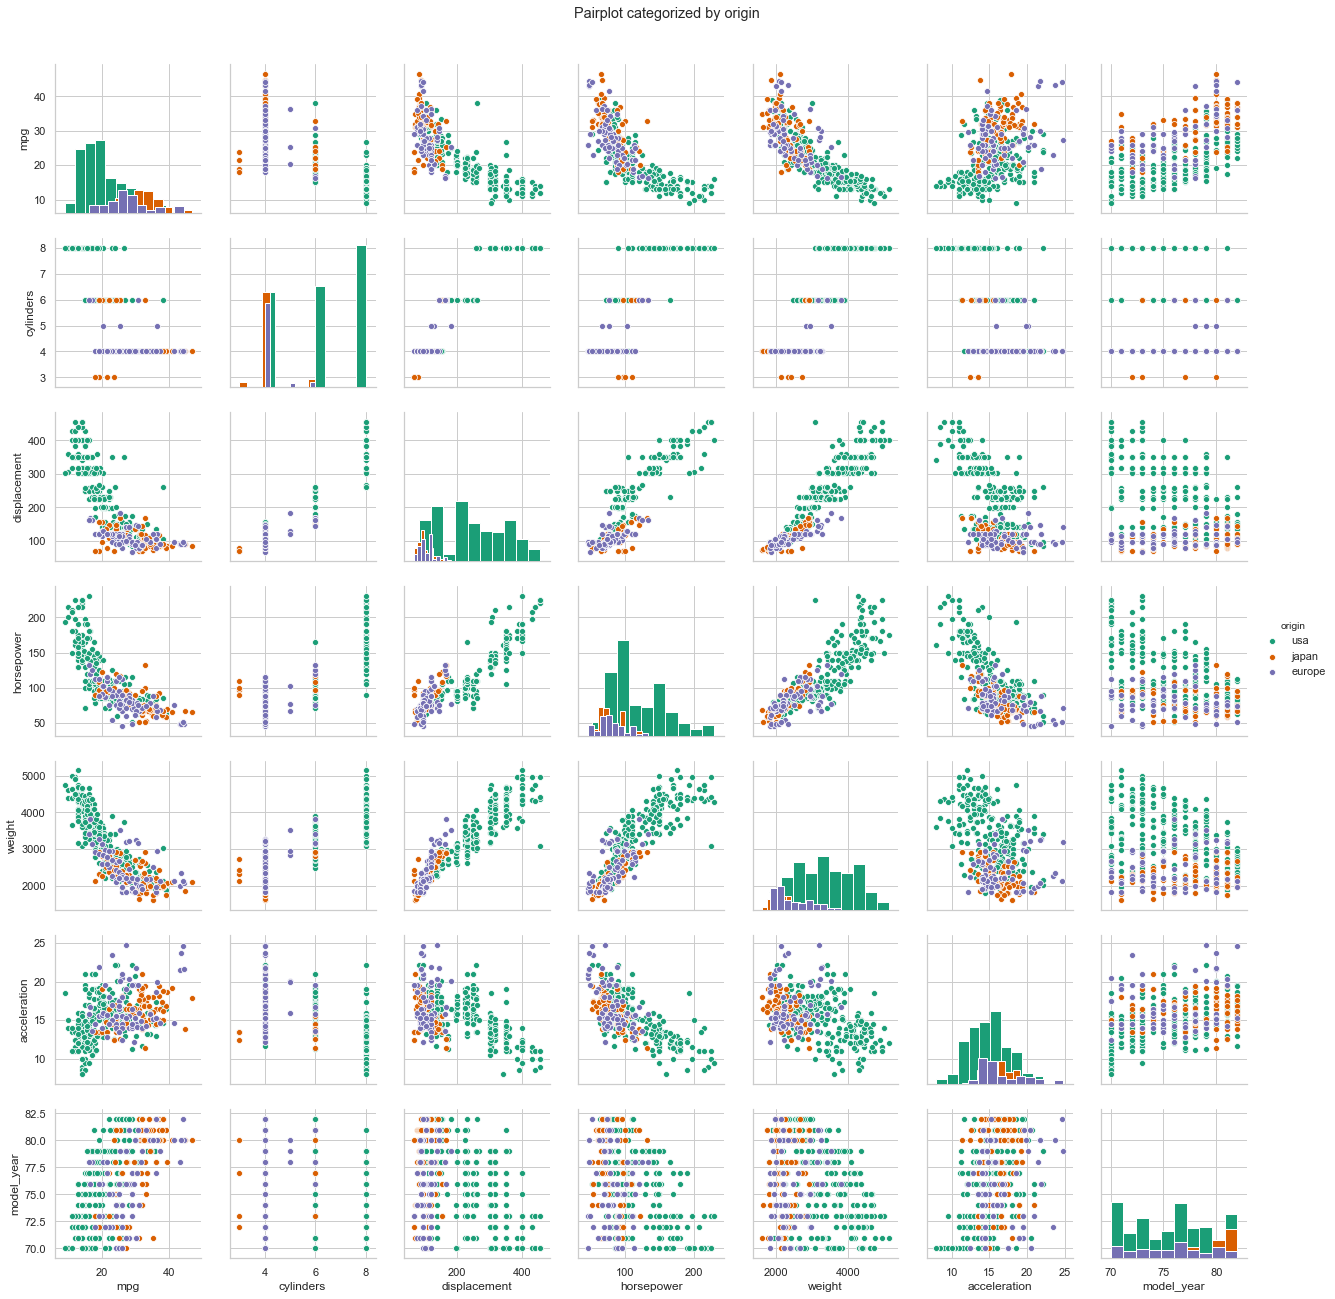

In [37]:
if visualize_dataset == True:
    # If dataset contains at least one categorical feature do this
    if "unique" in merged.columns:

        for column in chosen_categorical_features:

            plt.figure()
            myplot = seaborn.pairplot(data = data_no_nulls, 
                                      kind = non_identity_type,
                                      diag_kind = identity_type,
                                      hue = column,
                                      palette = palette
                                     )

            myplot.fig.suptitle("Pairplot categorized by {}".format(column), 
                         y = 1.03)

            plt.savefig(exportpath + column + "_pairplot.png")

    # If data set has no categorical features (only floats/ints) do this
    else:

        plt.figure()

        myplot = seaborn.pairplot(data = data_no_nulls, 
                                  kind = non_identity_type,
                                  diag_kind = identity_type
                                 )

        myplot.fig.suptitle("Pairplot", 
                     y = 1.03)

        plt.savefig(exportpath + "data_profile_pairplot.png")

### Correlation Heatmap

In [38]:
seaborn.set(rc = {"figure.figsize":(16,14)})

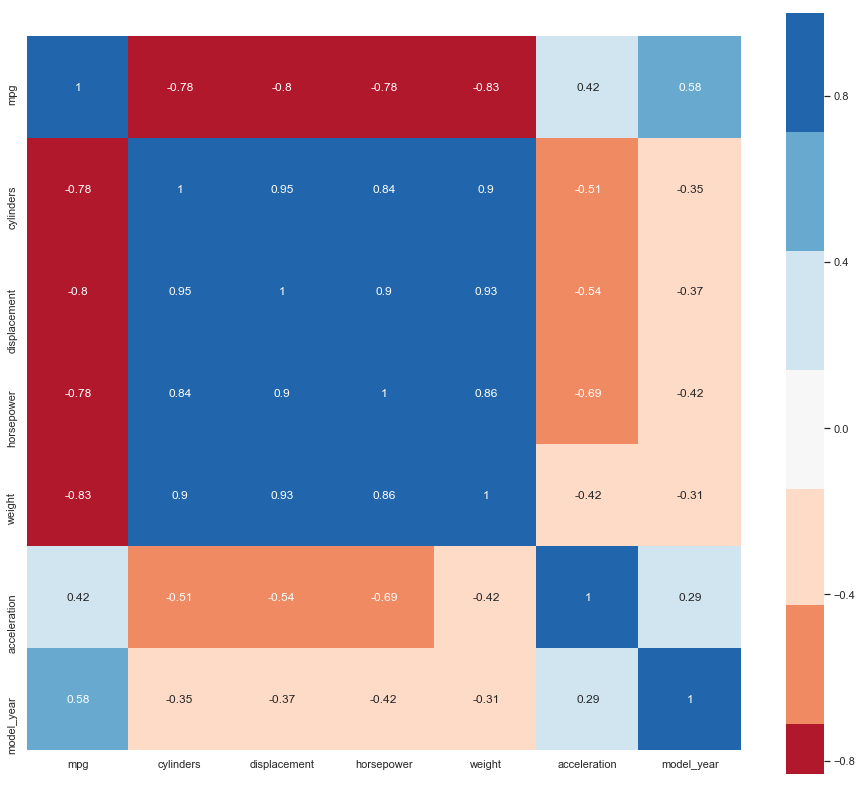

In [39]:
if visualize_dataset == True:
    
    #Create correlation Matrix
    correlation_dataframe = data.corr()
    
    #Create heatmap, show and export as .png
    seaborn.heatmap(data = correlation_dataframe,
               cmap = ['#b2182b',
                    '#ef8a62',
                    '#fddbc7',
                    '#f7f7f7',
                    '#d1e5f0',
                    '#67a9cf',
                    '#2166ac'],
               center = 0,
               square = True,
               annot = True).get_figure().savefig(exportpath + "heatmap.png")